In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))

In [9]:
training_set_scaled = sc.fit_transform(training_set)

In [11]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
X_train = []
y_train = []

In [12]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [13]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [15]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [20]:
X_train.shape

(1198, 60, 1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [19]:
regressor = Sequential()

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

In [22]:
regressor.add(Dropout(0.2))

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [24]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(Dense(units = 1))

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 46s 38ms/step - loss: 0.0532
Epoch 2/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0080
Epoch 3/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0056
Epoch 7/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0055
Epoch 10/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0052
Epoch 11/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 23s 19ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 23s 20ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 25s 20ms/step - loss: 0.0015


In [29]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [30]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [31]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [32]:
inputs = inputs.reshape(-1,1)

In [33]:
inputs = sc.transform(inputs)

In [34]:
X_test = []

In [35]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [36]:
X_test = np.array(X_test)

In [37]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [38]:
predicted_stock_price = regressor.predict(X_test)

In [39]:
predicted_stock_price

array([[0.92103267],
       [0.91617763],
       [0.9154177 ],
       [0.91731703],
       [0.922889  ],
       [0.9331589 ],
       [0.9438696 ],
       [0.94994426],
       [0.9518982 ],
       [0.9516429 ],
       [0.95064807],
       [0.9494461 ],
       [0.9484333 ],
       [0.94867563],
       [0.95001054],
       [0.95713913],
       [0.96915376],
       [0.9832387 ],
       [0.99278295],
       [0.98886096]], dtype=float32)

In [40]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [41]:
predicted_stock_price

array([[774.2303 ],
       [771.6204 ],
       [771.2119 ],
       [772.2329 ],
       [775.2282 ],
       [780.74884],
       [786.50653],
       [789.77203],
       [790.8224 ],
       [790.6851 ],
       [790.1503 ],
       [789.5042 ],
       [788.9598 ],
       [789.09   ],
       [789.8076 ],
       [793.6397 ],
       [800.09827],
       [807.66974],
       [812.80035],
       [810.6921 ]], dtype=float32)

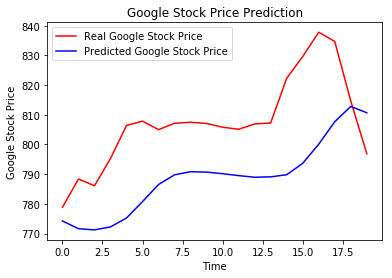

In [42]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()